Check Performance

In [1]:
from datetime import datetime
from sklearn.metrics import confusion_matrix
import itertools
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fileName1="Full60RGBAllUCF101Batch15-CM.txt"
fileName2="Full60FlowRGBKey60Batch15-CM.txt"
fileName3="Full60FlowRGB_MyKey25_Batch15-CM.txt"
d={'f1':'All-Frames','f2':'HGR-50%', 'f3':'Our-approach-25'}


In [6]:
print(fileName1)
print(fileName2)
print(fileName3)

Full60RGBAllUCF101Batch15-CM.txt
Full60FlowRGBKey60Batch15-CM.txt
Full60FlowRGB_MyKey25_Batch15-CM.txt


In [7]:
def get_Accuracy(cm, class_names):

    class_acc=[]
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i==j:
            class_acc.append(cm[i, j])
    #print(cm)
    return class_acc
    

def get_confusion_matrix(fileName):
    with open(fileName) as file:
        cm = [[float(digit) for digit in line.split()] for line in file]
    
    cm = np.array(cm, dtype=np.float32)
    class_acc=get_Accuracy(cm, class_names=target_names)
    return class_acc

In [8]:
def plot_barChart(class_acc1, class_acc2, class_acc3, init_range, end_rang, target_names):
    df=pd.DataFrame({d['f1']:class_acc1[init_range:end_rang],d['f2']:class_acc2[init_range:end_rang],d['f3']:class_acc3[init_range:end_rang],'Classes':target_names[init_range:end_rang]})
    df.plot(kind='bar' , x='Classes', linewidth=1, title='Number of Frames Extracted', rot=90, fontsize=18, figsize= (25,6))
    plt.show()
    
'''def plot_barChart(class_acc1, class_acc2, init_range, end_rang, target_names):
    df=pd.DataFrame({'Peak':class_acc1[init_range:end_rang],'Key60':class_acc2[init_range:end_rang],'Classes':target_names[init_range:end_rang]})
    df.plot(kind='bar' , x='Classes', linewidth=1, title='Performance', rot=90, fontsize=18, figsize= (25,6))
    plt.show()'''
    

"def plot_barChart(class_acc1, class_acc2, init_range, end_rang, target_names):\n    df=pd.DataFrame({'Peak':class_acc1[init_range:end_rang],'Key60':class_acc2[init_range:end_rang],'Classes':target_names[init_range:end_rang]})\n    df.plot(kind='bar' , x='Classes', linewidth=1, title='Performance', rot=90, fontsize=18, figsize= (25,6))\n    plt.show()"

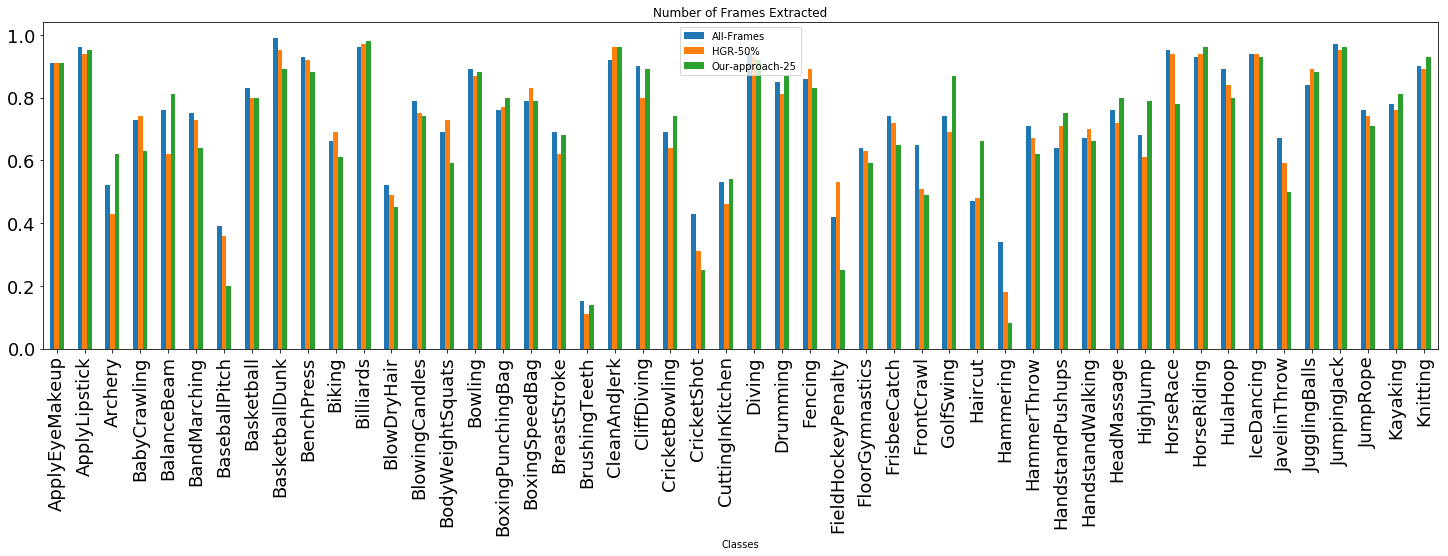

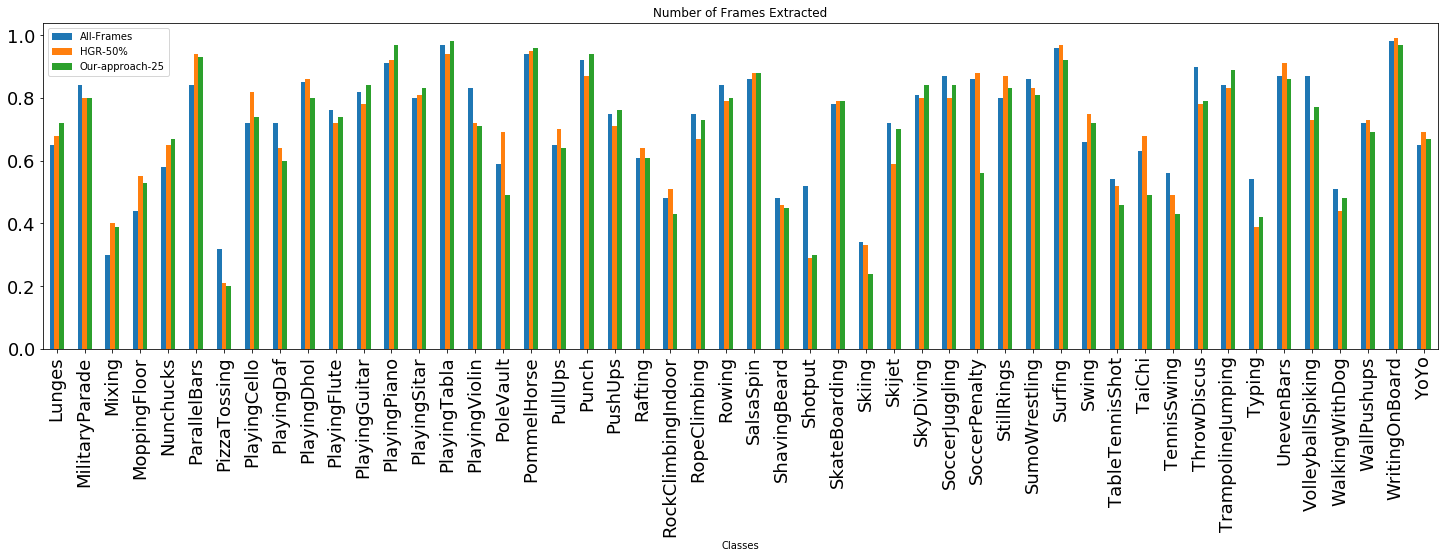

In [9]:
from sklearn.metrics import confusion_matrix

with open('class_names.txt') as f:
    target_names = [line.rstrip() for line in f]
    

class_acc1=get_confusion_matrix(fileName1)
class_acc2=get_confusion_matrix(fileName2)
class_acc3=get_confusion_matrix(fileName3)
    
plot_barChart(class_acc1,class_acc2,class_acc3,0,50, target_names)
plot_barChart(class_acc1,class_acc2,class_acc3,51,101, target_names)

#plot_barChart(class_acc1,class_acc2,0,50, target_names)
#plot_barChart(class_acc1,class_acc2,51,101, target_names)

In [10]:
frame_file1="Sample-Full-Flow-All-UCF101.csv"
frame_file2="Sample-Full-RGB-Key50_UCF101.csv"
frame_file3="Sample-Full-Flow-My_25_Key-UCF101.csv"

In [11]:
def get_frames_count(fileName):
    file_obj = open(fileName, "r")
  
    # reading the data from the file
    file_data = file_obj.read()

    # splitting the file data into lines
    lines = file_data.splitlines()
    
    frame_count=[x.split(',')[1] for x in lines]
    file_obj.close()
    #print(frame_count)
    return np.array(frame_count,dtype=np.int32)

In [91]:
frame_count1=get_frames_count(frame_file1)
frame_count2=get_frames_count(frame_file2)
frame_count3=get_frames_count(frame_file3)

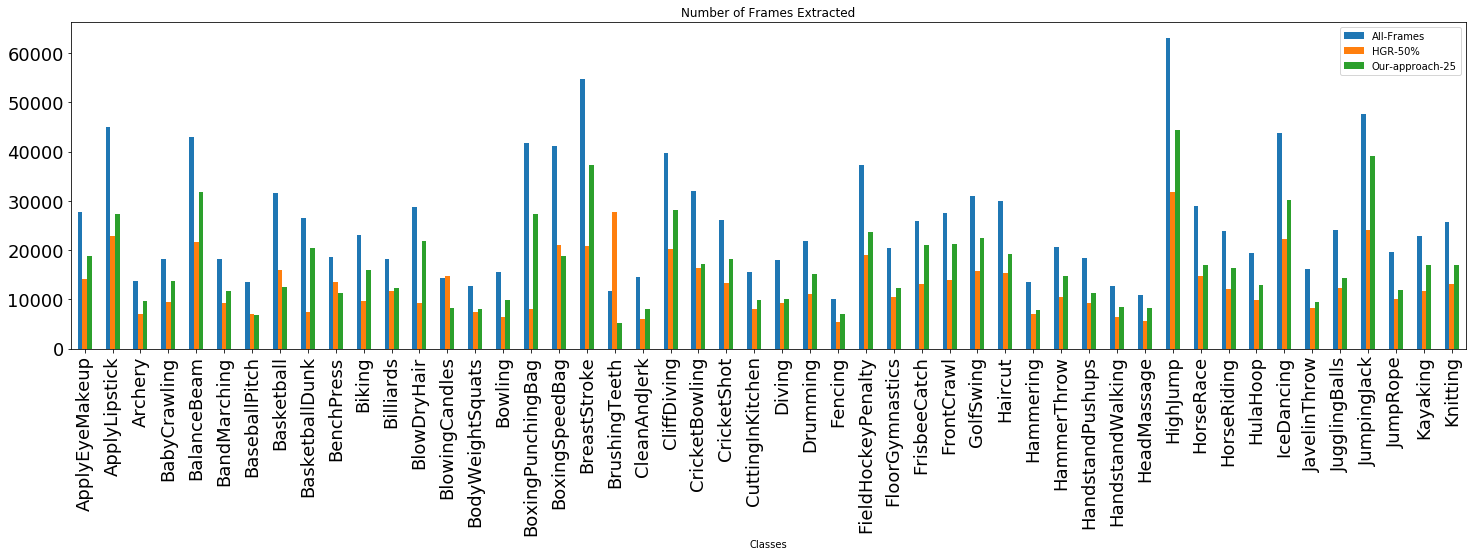

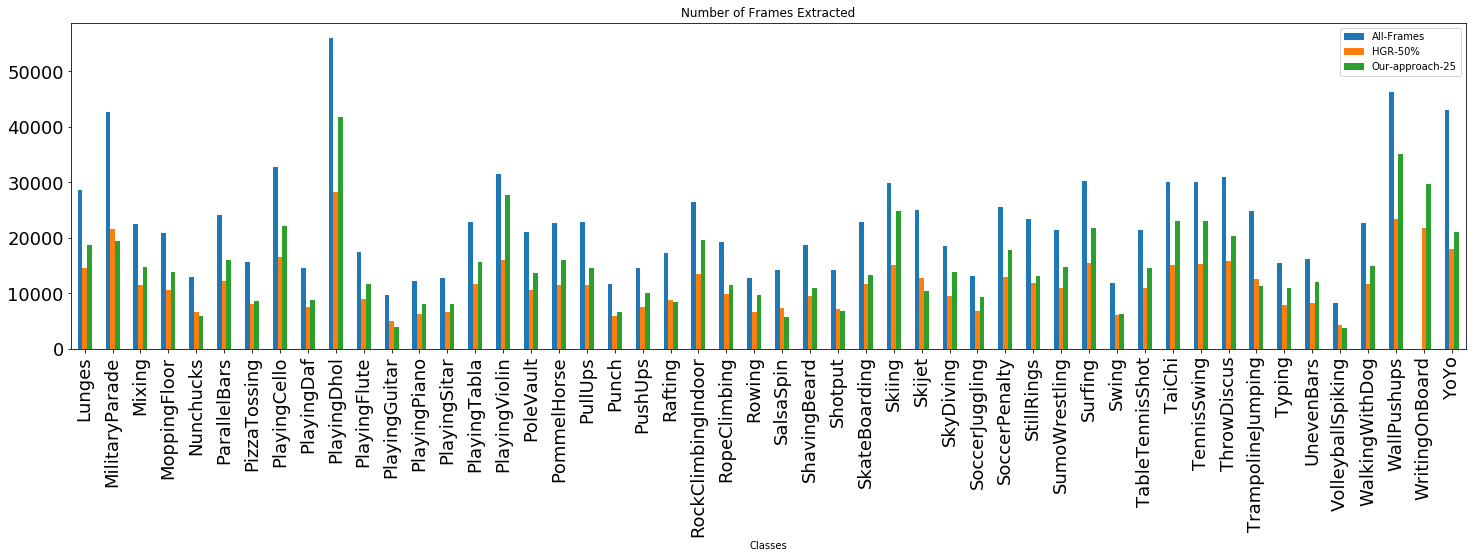

In [92]:
plot_barChart(frame_count1,frame_count2,frame_count3,0,50, target_names)
plot_barChart(frame_count1,frame_count2,frame_count3,51,101, target_names)